/tmp/ipykernel_8125/4089708532.py:31: DtypeWarning: Columns (28,30,32,34,36,38,40,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  steamboat_climate_df = pd.read_csv(SteamboatClimateURL,


Missing TMAX values: 368
Filtered Date range: 1908-09-02 00:00:00 to 2024-09-18 00:00:00


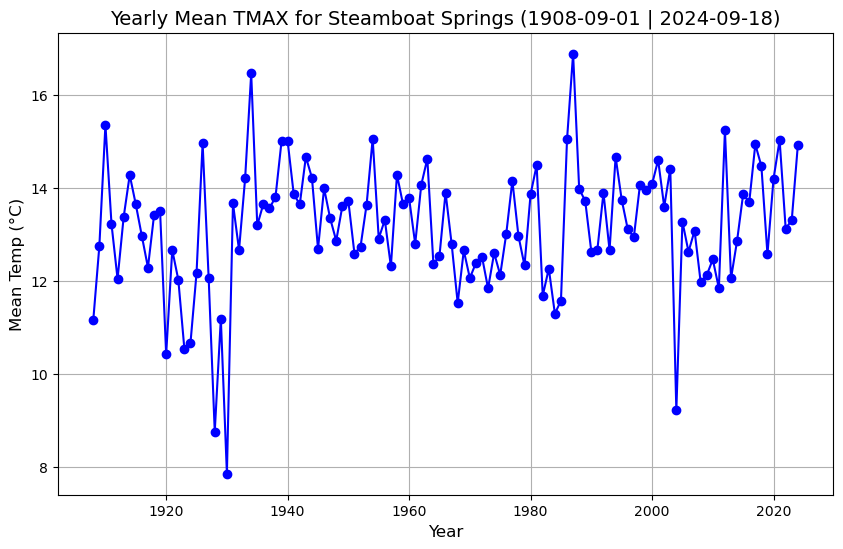

KeyError: 'Year'

In [3]:
import pandas as pd
import numpy as np
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

# Having problems with code like this due to site timeout
# Read Global Historical Climatology Network daily (GHCNd) for the
# station with the largest dataset in Steamboat Springs, Colorado
# ran ok on 9/26, timing out on 9/27
# SteamboatTempURL = ('https://www.ncei.noaa.gov/access/services/data/v1?'
#    'dataset=daily-summaries'
#    '&dataTypes=TMAX'
#    '&dataTypes=TMIN'
#    '&stations=USC00057936'
#    '&startDate=1893-02-01'
#    '&endDate=2024-09-25'
#    '&units=metric')
# Google Drive file ID downloaded on 2024-09-19
# This file was edited to fix date parsing problems from original form MM/DD/YYYY to YYYY-MM-DD
# This file has all climate data for the station USC00057936 through 2024-09-18
file_id = '1tXD2YGxhEwXQ83UDxvad_co0fUc4Dn9m'

# Create a URL for direct download
SteamboatClimateURL = f'https://drive.google.com/uc?id={file_id}'

# Read the data from the CSV file
steamboat_climate_df = pd.read_csv(SteamboatClimateURL,
                                   index_col='DATE', 
                                   parse_dates=True, 
                                   na_values=['NaN'])

# Ensure that the index is properly converted to DatetimeIndex
steamboat_climate_df.index = pd.to_datetime(steamboat_climate_df.index, errors='coerce')

# Filter the data to only include rows from September 1908 onwards
start_date = '1908-09-01'
steamboat_climate_df = steamboat_climate_df[steamboat_climate_df.index >= start_date]

# Check for missing data in TMAX
print("Missing TMAX values:", steamboat_climate_df['TMAX'].isna().sum())

# Drop rows where TMAX is NaN to avoid issues with plotting
steamboat_climate_df = steamboat_climate_df.dropna(subset=['TMAX'])

# Check the date range of the data to ensure it continues past 1908
print("Filtered Date range:", steamboat_climate_df.index.min(), "to", steamboat_climate_df.index.max())

# Resample data to yearly frequency and calculate the mean for TMAX
steamboat_yearly_mean_df = steamboat_climate_df['TMAX'].resample('YS').mean()

# Plot the yearly mean of TMAX
plt.figure(figsize=(10, 6))
plt.plot(steamboat_yearly_mean_df.index, steamboat_yearly_mean_df, marker='o', linestyle='-', color='b')
plt.title('Yearly Mean TMAX for Steamboat Springs (1908-09-01 | 2024-09-18)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Temp (°C)', fontsize=12)
plt.grid(True)
plt.show()

steamboat_yearly_mean_df

# Remove rows with missing or infinite values to avoid NaN slope
steamboat_yearly_mean_df = steamboat_yearly_mean_df.replace([np.inf, -np.inf], np.nan).dropna()

# Plot annual average temperature data with a red trend line for the filtered data
ax = sns.regplot(
    x=steamboat_yearly_mean_df['Year'],
    y=bco_ann_climate_df_filtered['TMAX'],
    line_kws={'color': 'red'},  # Change the trend line to red
)

# Set plot labels
ax.set(
    title='Steamboat Colorado Observed Temperature Trend (1901-2024)',
    xlabel='YEAR',
    ylabel='Temperature ($^\circ$C)'  # Updated unit to Celsius
)

# Prepare data for statsmodels OLS Regression
X = steamboat_yearly_mean_df[['Year']]  # Predictor variable (Year)
y = steamboat_yearly_mean_dfd['TMAX']  # Response variable (Temperature)

# Add a constant (intercept term) to the predictor
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the OLS model summary
print(model.summary())

# Extract the slope and intercept
slope = model.params['Year']
intercept = model.params['const']
print(f"Slope: {slope:.4f} °C/year")
print(f"Intercept: {intercept:.4f} °C")
